# ADA final exam (winter semester 2019/2020)

A friend of yours wants to start a YouTube channel and ideally earn some money via ads. However, there are so many channels and videos out there that your friend has no idea where to even start. Fortunately, they know that you have taken ADA and think you might help them out by analyzing the videos that are currently on YouTube.

The data you are provided with is a subset of YouTube videos, with videos from some of the giant channels in two categories: "Gaming" and "How-to & Style", which are the categories your friend is choosing between. The dataset contains a lot of videos, with data on those videos including their titles, their total number of views in 2019, their tags and descriptions, etc. The data is, in gzip-compressed format, contained in the `data/` folder, as the file `youtube.csv.gz`.

The three tasks A, B and C are **independent** of each other, and you can solve any combination of them. The exam is designed for more than 3 hours, so don't worry if you don't manage to solve everything; you can still score a 6.

You need to run the following two cells to read and prepare the dataset.

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from scipy import stats
from sklearn.model_selection import train_test_split

In [15]:
youtube = pd.read_csv('data/youtube.csv.gz', compression='gzip')
youtube.upload_date = pd.to_datetime(youtube.upload_date)

## Dataset description

Each row of the dataset corresponds to one video that was uploaded to YouTube. There are 11 columns:
'channel', 'upload_date', 'title', 'categories', 'tags', 'duration',
       'view_count', 'average_rating', 'height', 'width', 'channel_cat'.
- `channel`: The channel (account) on which the video was uploaded.
- `upload_date`: The date on which the video was uploaded (Pandas Timestamp object).
- `title`: The title of the video.
- `tags`: A list of words that describe the video.
- `duration`: The duration of the video in seconds.
- `view_count`: The number of times the video was watched.
- `average_rating`: The average score with which the viewers rated the video (1-5).
- `height`: The height of the video in pixels.
- `width`: The width of the video in pixels.
- `channel_cat`: The category of the channel on which this video was uploaded. This dataset only contains videos from channels from the 'Gaming' and the 'Howto & Style' category.

# Task A: Welcome to the exam!

All of Task A refers to the videos that were published between and including 2010 and 2018.

## A1: A growing platform?

You would first like to know whether YouTube in general is the right platform to invest time into.

1. Using the appropriate plot type, plot the number of videos published per year between and including 2010 and 2018.

In [16]:
youtube.head()

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat
0,PewDiePie,2013-03-04,A NEW ADVENTURE! - Kingdom Hearts (1) w/ Pewds,"['lets', 'play', 'horror', 'game', 'walkthroug...",1126.0,2541550.0,4.886102,720.0,1280.0,Gaming
1,PewDiePie,2013-03-04,SAVING PRIVATE PEWDS - Conker's Bad Fur Day (15),"['lets', 'play', 'horror', 'game', 'walkthroug...",903.0,1727646.0,4.951531,720.0,1280.0,Gaming
2,PewDiePie,2013-03-04,THE WORST SCARE! - Amnesia: Rain (4),"['lets', 'play', 'horror', 'game', 'walkthroug...",806.0,1402747.0,4.962706,720.0,1280.0,Gaming
3,PewDiePie,2013-03-03,Nova / Sp00n / Cry / Pewds - Worms Revolution ...,"['lets', 'play', 'horror', 'game', 'walkthroug...",909.0,4348296.0,4.937665,720.0,1280.0,Gaming
4,PewDiePie,2013-03-03,SEXIEST HORROR EVER - Amnesia: Rain (3),"['lets', 'play', 'horror', 'game', 'walkthroug...",834.0,1410659.0,4.957545,720.0,1280.0,Gaming


In [13]:
youtube['upload_date'][0].year

2013

In [20]:
youtube_year=youtube.copy()
youtube_year['upload_date_year']=youtube_year['upload_date'].apply(lambda x: x.year)
youtube_year.head()

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat,upload_date_year
0,PewDiePie,2013-03-04,A NEW ADVENTURE! - Kingdom Hearts (1) w/ Pewds,"['lets', 'play', 'horror', 'game', 'walkthroug...",1126.0,2541550.0,4.886102,720.0,1280.0,Gaming,2013
1,PewDiePie,2013-03-04,SAVING PRIVATE PEWDS - Conker's Bad Fur Day (15),"['lets', 'play', 'horror', 'game', 'walkthroug...",903.0,1727646.0,4.951531,720.0,1280.0,Gaming,2013
2,PewDiePie,2013-03-04,THE WORST SCARE! - Amnesia: Rain (4),"['lets', 'play', 'horror', 'game', 'walkthroug...",806.0,1402747.0,4.962706,720.0,1280.0,Gaming,2013
3,PewDiePie,2013-03-03,Nova / Sp00n / Cry / Pewds - Worms Revolution ...,"['lets', 'play', 'horror', 'game', 'walkthroug...",909.0,4348296.0,4.937665,720.0,1280.0,Gaming,2013
4,PewDiePie,2013-03-03,SEXIEST HORROR EVER - Amnesia: Rain (3),"['lets', 'play', 'horror', 'game', 'walkthroug...",834.0,1410659.0,4.957545,720.0,1280.0,Gaming,2013


In [33]:
year_count=youtube_year[['upload_date_year']].value_counts('upload_date_year').reset_index()
year_count.columns=['year','number']
year_count

,year,number
0,2014,20216
1,2013,18309
2,2017,17356
3,2018,16665
4,2016,15966
5,2015,15704
6,2012,12987
7,2019,9338
8,2011,7929
9,2010,2731


In [44]:
year_count=year_count[2009<year_count['year']]
year_count=year_count[year_count['year']<2019].sort_values(by=['year'])
year_count

,year,number
9,2010,2731
8,2011,7929
6,2012,12987
1,2013,18309
0,2014,20216
5,2015,15704
4,2016,15966
2,2017,17356
3,2018,16665


<AxesSubplot:title={'center':'number of videos published per year between and including 2010 and 2018'}, xlabel='year'>

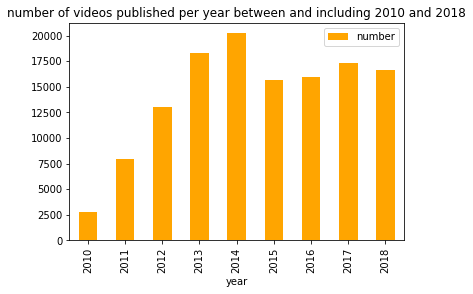

In [49]:
year_count.plot.bar(x="year",y="number",color='orange',title="number of videos published per year between and including 2010 and 2018")


2. Now for each year, plot the number of channels that have been created between the beginning of 2010 and the end of that year. A channel is considered to be created at the time at which they upload their first video.

In [55]:
def find_min(line):
    all_year=set(line['upload_date_year'])
    return min(all_year)

In [60]:
youtube_first_published=youtube_year.groupby('channel').apply(find_min).reset_index()
youtube_first_published.columns=['channel','first_publish']

In [61]:
youtube_first_published

,channel,first_publish
0,5-Minute Crafts,2016
1,5-Minute Crafts GIRLY,2018
2,5-Minute Crafts PLAY,2017
3,ATHLEAN-X™,2009
4,Ali-A,2009
...,...,...
190,speedyw03,2010
191,stampylonghead,2012
192,theRadBrad,2010
193,videogamedunkey,2010


In [62]:
youtube_first_published=youtube_first_published[youtube_first_published['first_publish']>2009]

In [65]:
youtube_first_published_count=youtube_first_published.groupby('first_publish').count().reset_index()
youtube_first_published_count

,first_publish,channel
0,2010,21
1,2011,26
2,2012,34
3,2013,21
4,2014,18
5,2015,13
6,2016,12
7,2017,17
8,2018,2


In [68]:
x=0;
for idx, row in youtube_first_published_count.iterrows():
    row['channel']=x+row['channel']
    x=row['channel']

In [69]:
youtube_first_published_count

,first_publish,channel
0,2010,21
1,2011,47
2,2012,81
3,2013,102
4,2014,120
5,2015,133
6,2016,145
7,2017,162
8,2018,164


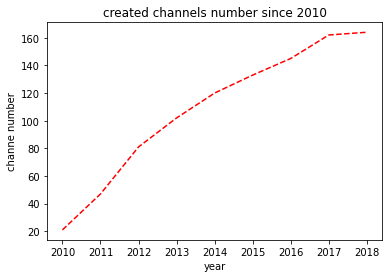

In [75]:
plt.plot(youtube_first_published_count['first_publish'],youtube_first_published_count['channel'],'r--')
plt.xlabel('year')
plt.ylabel('channe number')
plt.title('created channels number since 2010')
plt.show()

3. Normalize the number of videos published each year by the number of channels that have been created between the beginning of 2010 and the end of that year, and plot these quantities. Do seperate plots for gaming channels, how-to channels, and both together. Can you conclude from the plot that both gaming and how-to channels have been becoming less and less active recently? Why, or why not?

In [106]:
year_count

,year,number
9,2010,2731
8,2011,7929
6,2012,12987
1,2013,18309
0,2014,20216
5,2015,15704
4,2016,15966
2,2017,17356
3,2018,16665


In [110]:
youtube_first_published_count.columns=['year','channel_number']
youtube_first_published_count

,year,channel_number
0,2010,21
1,2011,47
2,2012,81
3,2013,102
4,2014,120
5,2015,133
6,2016,145
7,2017,162
8,2018,164


In [112]:
normalized_year_count=pd.merge(year_count,youtube_first_published_count,how='inner',on=["year"],right_index=True)
normalized_year_count

,year,number,channel_number
9,2010,2731,21
8,2011,7929,47
6,2012,12987,81
1,2013,18309,102
0,2014,20216,120
5,2015,15704,133
4,2016,15966,145
2,2017,17356,162
3,2018,16665,164


In [113]:
normalized_year_count['normalized_number']=normalized_year_count['number']/normalized_year_count['channel_number']
normalized_year_count

,year,number,channel_number,normalized_number
9,2010,2731,21,130.047619
8,2011,7929,47,168.702128
6,2012,12987,81,160.333333
1,2013,18309,102,179.500000
0,2014,20216,120,168.466667
5,2015,15704,133,118.075188
4,2016,15966,145,110.110345
2,2017,17356,162,107.135802
3,2018,16665,164,101.615854


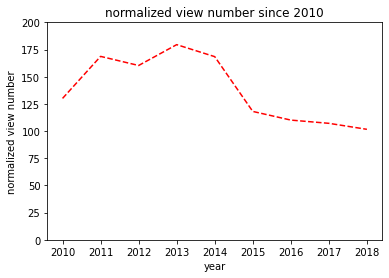

In [119]:
plt.plot(normalized_year_count['year'],normalized_year_count['normalized_number'],'r--')
plt.xlabel('year')
plt.ylabel('normalized view number')
plt.title('normalized view number since 2010')
plt.ylim((0, 200))
plt.show()

In [132]:
#Game
youtube_year_Game=youtube_year[youtube_year['channel_cat']=='Gaming']
youtube_year_Game_count=youtube_year_Game.groupby(['upload_date_year']).count().reset_index()[['upload_date_year','channel']]

In [150]:
youtube_year_Game_count.columns=['year','view_number']

In [136]:
youtube_Game_first_published=youtube_year_Game.groupby('channel').apply(find_min).reset_index()
youtube_Game_first_published.columns=['channel','first_publish']
youtube_Game_first_published=youtube_Game_first_published[youtube_Game_first_published['first_publish']>2009]
youtube_Game_first_published_count=youtube_Game_first_published.groupby('first_publish').count().reset_index()
x=0;
for idx, row in youtube_Game_first_published_count.iterrows():
    row['channel']=x+row['channel']
    x=row['channel']

In [149]:
youtube_Game_first_published_count.columns=['year','channel_number']

In [476]:
youtube_year_Game_count_normalized=pd.merge(youtube_year_Game_count,youtube_first_published_count,how='inner',on=["year"],right_index=True)
youtube_year_Game_count_normalized['normalized_view_number']=youtube_year_Game_count_normalized['view_number']/youtube_year_Game_count_normalized['channel_number']
youtube_year_Game_count_normalized

,year,view_number,channel_number,normalized_view_number
4,2010,1560,21,74.285714
5,2011,5563,47,118.361702
6,2012,8922,81,110.148148
7,2013,13511,102,132.460784
8,2014,15076,120,125.633333
9,2015,10192,133,76.631579
10,2016,8492,145,58.565517
11,2017,8047,162,49.672840
12,2018,7144,164,43.560976


In [161]:
#howto
youtube_year_Howto=youtube_year[youtube_year['channel_cat']=='Howto & Style']
youtube_year_Howto_count=youtube_year_Howto.groupby(['upload_date_year']).count().reset_index()[['upload_date_year','channel']]

In [162]:
youtube_year_Howto_count.columns=['year','view_number']

In [163]:
youtube_Howto_first_published=youtube_year_Howto.groupby('channel').apply(find_min).reset_index()
youtube_Howto_first_published.columns=['channel','first_publish']
youtube_Howto_first_published=youtube_Howto_first_published[youtube_Howto_first_published['first_publish']>2009]
youtube_Howto_first_published_count=youtube_Howto_first_published.groupby('first_publish').count().reset_index()
x=0;
for idx, row in youtube_Howto_first_published_count.iterrows():
    row['channel']=x+row['channel']
    x=row['channel']

In [164]:
youtube_Howto_first_published_count.columns=['year','channel_number']
youtube_Howto_first_published_count

,year,channel_number
0,2010,7
1,2011,16
2,2012,30
3,2013,39
4,2014,48
5,2015,52
6,2016,61
7,2017,73
8,2018,75


In [477]:
youtube_year_Howto_count_normalized=pd.merge(youtube_year_Howto_count,youtube_first_published_count,how='inner',on=["year"],right_index=True)
youtube_year_Howto_count_normalized['normalized_view_number']=youtube_year_Howto_count_normalized['view_number']/youtube_year_Howto_count_normalized['channel_number']
youtube_year_Howto_count_normalized

,year,view_number,channel_number,normalized_view_number
4,2010,1171,21,55.761905
5,2011,2366,47,50.340426
6,2012,4065,81,50.185185
7,2013,4798,102,47.039216
8,2014,5140,120,42.833333
9,2015,5512,133,41.443609
10,2016,7474,145,51.544828
11,2017,9309,162,57.462963
12,2018,9521,164,58.054878


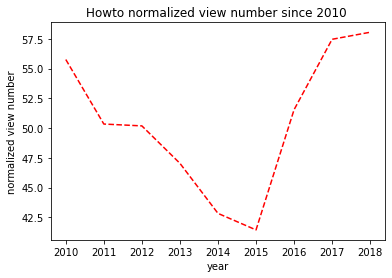

In [478]:
plt.plot(youtube_year_Howto_count_normalized['year'],youtube_year_Howto_count_normalized['normalized_view_number'],'r--')
plt.xlabel('year')
plt.ylabel('normalized view number')
plt.title('Howto normalized view number since 2010 ')
plt.show()

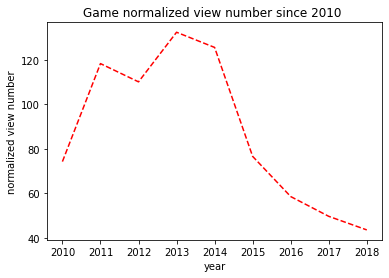

In [479]:
plt.plot(youtube_year_Game_count_normalized['year'],youtube_year_Game_count_normalized['normalized_view_number'],'r--')
plt.xlabel('year')
plt.ylabel('normalized view number')
plt.title('Game normalized view number since 2010 ')
plt.show()

In [481]:
y=youtube_year_Game_count_normalized['normalized_view_number']+youtube_year_Howto_count_normalized['normalized_view_number']

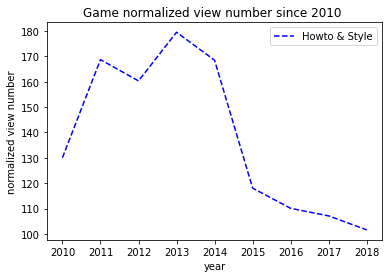

In [482]:
# plt.plot(youtube_year_Game_count_normalized['year'],youtube_year_Game_count_normalized['normalized_view_number'],'r--',label='Game')
plt.plot(youtube_year_Howto_count_normalized['year'],y,'b--',label='Howto & Style')
plt.legend()
plt.xlabel('year')
plt.ylabel('normalized view number')
plt.title('Game normalized view number since 2010 ')
plt.show()

In [466]:
youtube_year_Howto_count_normalized

,year,view_number,channel_number,normalized_view_number
4,2010,1171,7,167.285714
5,2011,2366,16,147.875000
6,2012,4065,30,135.500000
7,2013,4798,39,123.025641
8,2014,5140,48,107.083333
9,2015,5512,52,106.000000
10,2016,7474,61,122.524590
11,2017,9309,73,127.520548
12,2018,9521,75,126.946667


4     390.142857
5     495.562500
6     432.900000
7     469.461538
8     421.166667
9     302.000000
10    261.737705
11    237.753425
12    222.200000
Name: normalized_view_number, dtype: float64

## A2: The one thing we all love: cash money

Your friend is really keen on making money from their YouTube channel through ads and wants you to help them choose the most profitable channel category (Gaming or Howto & Style). The ad profit is directly proportional to the number of views of a video.

1. Since your friend wants to keep producing videos for several years to come, it might also be worth looking at the growth of the two categories.
  1. Compute the total number of views in each category per year for the years 2010-2018.
  2. Divide the yearly view count by the number of channels that posted a video in each category in each year. Plot these normalized counts.




In [214]:
cat_num_view_per_year=youtube_year.groupby(["channel_cat","upload_date_year"])['view_count'].sum().reset_index()

In [215]:
cat_num_view_per_year

,channel_cat,upload_date_year,view_count
0,Gaming,2006,8.974511e+06
1,Gaming,2007,9.982276e+06
2,Gaming,2008,1.097334e+07
3,Gaming,2009,3.644940e+08
4,Gaming,2010,7.792190e+08
5,Gaming,2011,2.500144e+09
6,Gaming,2012,6.189954e+09
7,Gaming,2013,1.503147e+10
8,Gaming,2014,2.497133e+10
9,Gaming,2015,1.812132e+10


In [448]:
cat_num_view_per_year[cat_num_view_per_year['channel_cat']=='Gaming']['view_count'].sum()

135986429274.0

In [449]:
cat_num_view_per_year[cat_num_view_per_year['channel_cat']=='Howto & Style']['view_count'].sum()

86493243255.0

In [86]:
channel_per_year=youtube_year.groupby(["channel_cat","upload_date_year","channel"]).count().reset_index()[["channel_cat","upload_date_year","channel"]]

In [93]:
channel_per_year_count=channel_per_year.groupby(["channel_cat","upload_date_year"]).count().reset_index()
channel_per_year_count.columns=["channel_cat","upload_date_year","channel_number"]
channel_per_year_count

,channel_cat,upload_date_year,channel_number
0,Gaming,2006,2
1,Gaming,2007,1
2,Gaming,2008,4
3,Gaming,2009,10
4,Gaming,2010,24
5,Gaming,2011,41
6,Gaming,2012,57
7,Gaming,2013,66
8,Gaming,2014,69
9,Gaming,2015,63


In [217]:
combine_per_year=pd.merge(cat_num_view_per_year,channel_per_year_count,how='inner',on=["channel_cat","upload_date_year"],right_index=True)
combine_per_year

,channel_cat,upload_date_year,view_count,channel_number
0,Gaming,2006,8.974511e+06,2
1,Gaming,2007,9.982276e+06,1
2,Gaming,2008,1.097334e+07,4
3,Gaming,2009,3.644940e+08,10
4,Gaming,2010,7.792190e+08,24
5,Gaming,2011,2.500144e+09,41
6,Gaming,2012,6.189954e+09,57
7,Gaming,2013,1.503147e+10,66
8,Gaming,2014,2.497133e+10,69
9,Gaming,2015,1.812132e+10,63


In [218]:
combine_per_year['normalized_view']=combine_per_year['view_count']/combine_per_year['channel_number']

In [219]:
combine_per_year

,channel_cat,upload_date_year,view_count,channel_number,normalized_view
0,Gaming,2006,8.974511e+06,2,4.487256e+06
1,Gaming,2007,9.982276e+06,1,9.982276e+06
2,Gaming,2008,1.097334e+07,4,2.743335e+06
3,Gaming,2009,3.644940e+08,10,3.644940e+07
4,Gaming,2010,7.792190e+08,24,3.246746e+07
5,Gaming,2011,2.500144e+09,41,6.097913e+07
6,Gaming,2012,6.189954e+09,57,1.085957e+08
7,Gaming,2013,1.503147e+10,66,2.277496e+08
8,Gaming,2014,2.497133e+10,69,3.619033e+08
9,Gaming,2015,1.812132e+10,63,2.876399e+08


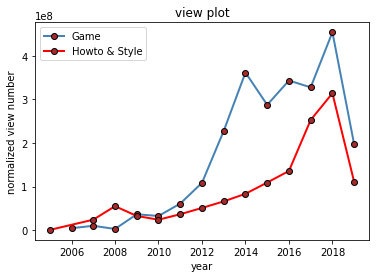

In [221]:
plt.plot(combine_per_year[combine_per_year['channel_cat']=='Gaming']['upload_date_year'],
         combine_per_year[combine_per_year['channel_cat']=='Gaming']['normalized_view'],
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         label='Game',
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色
plt.plot(combine_per_year[combine_per_year['channel_cat']=='Howto & Style']['upload_date_year'],
         combine_per_year[combine_per_year['channel_cat']=='Howto & Style']['normalized_view'],
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'red', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         label='Howto & Style',
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色
plt.legend()
plt.title('view plot')
plt.xlabel('year')
plt.ylabel('normalized view number')
plt.show()

2. Your friend's channel will be brand new, so you decide to look more closely at newer channels. For this question and all the following questions in A2, only consider channels that uploaded their first video in  2016 or later. Compute the total number of views in each category and divide it by the number of channels in that category.


In [172]:
youtube_first_published_2016=youtube_first_published[youtube_first_published['first_publish']>2015]
youtube_first_published_2016.head()

,channel,first_publish
0,5-Minute Crafts,2016
1,5-Minute Crafts GIRLY,2018
2,5-Minute Crafts PLAY,2017
5,Anaysa,2016
6,Antonio Garza,2018


In [222]:
youtube_year_2016=youtube_year[youtube_year['channel'].isin(youtube_first_published_2016['channel'])]
youtube_year_2016_percat=youtube_year_2016.groupby('channel_cat')['view_count'].sum().reset_index()
youtube_year_2016_percat.columns=['channel_cat','total_view_number']
youtube_year_2016_percat

,channel_cat,total_view_number
0,Gaming,7.163275e+09
1,Howto & Style,3.160511e+10


In [206]:
youtube_year_2016_catnum=youtube_year_2016.groupby(['channel_cat','channel']).count().reset_index()[['channel_cat','channel']].groupby('channel_cat').count().reset_index()
youtube_year_2016_catnum

,channel_cat,channel
0,Gaming,8
1,Howto & Style,23


In [223]:
# youtube_year_2016_percat['total_view_number_per_channel']=youtube_year_2016_percat['total_view_number']
youtube_year_2016_percat=pd.merge(youtube_year_2016_percat,youtube_year_2016_catnum,how='inner',on=["channel_cat"],right_index=True)
youtube_year_2016_percat

,channel_cat,total_view_number,channel
0,Gaming,7.163275e+09,8
1,Howto & Style,3.160511e+10,23


In [224]:
youtube_year_2016_percat['divided']=youtube_year_2016_percat['total_view_number']/youtube_year_2016_percat['channel']
youtube_year_2016_percat

,channel_cat,total_view_number,channel,divided
0,Gaming,7.163275e+09,8,8.954094e+08
1,Howto & Style,3.160511e+10,23,1.374135e+09


3. The number of views might be very unevenly over the different channels, and channels might upload different numbers of videos.
  1. Compute the mean number of views per video for each channel.
  2. Compute the mean of these means for each of the two categories. Print these values.
  3. Using bootstrapping, compute 95% confidence intervals for these two means. From this analysis, can you draw a recommendation for one of the two categories? Why, or why not?

In [232]:
#A
mean_A=youtube_year.groupby(['channel_cat','channel'])['view_count'].mean().reset_index()
mean_A

,channel_cat,channel,view_count
0,Gaming,Ali-A,8.024477e+05
1,Gaming,Aphmau,1.802964e+06
2,Gaming,Azerrz,1.973290e+06
3,Gaming,BCC Trolling,1.410655e+05
4,Gaming,Bajan Canadian,5.010471e+05
...,...,...,...
190,Howto & Style,cutepolish,9.783654e+05
191,Howto & Style,dope2111,6.847769e+06
192,Howto & Style,grav3yardgirl,1.156872e+06
193,Howto & Style,jaipurthepinkcity,2.536944e+05


#B Compute the mean of these means for each of the two categories. Print these values.

In [234]:
mean_B=youtube_year.groupby(['channel_cat','channel'])['view_count'].mean().reset_index().groupby("channel_cat")['view_count'].mean().reset_index()
mean_B

,channel_cat,view_count
0,Gaming,2.236226e+06
1,Howto & Style,2.314795e+06


In [ ]:
# Using bootstrapping, compute 95% confidence intervals for these two means. 
# From this analysis, can you draw a recommendation for one of the two categories? 
# Why, or why not?

In [237]:
stats.ttest_ind(mean_A.loc[mean_A['channel_cat'] == 'Gaming']['view_count'], mean_A.loc[mean_A['channel_cat'] == 'Howto & Style'][['view_count']])

Ttest_indResult(statistic=array([-0.17094597]), pvalue=array([0.86444533]))

In [452]:
def do_bootstrap(data, n=1000):
    sample_statistic = [] 
    for _ in range(n):
        sampled_data = np.random.choice(data, size=len(data))  
        sample_statistic.append(np.mean(sampled_data))
    return (np.percentile(sample_statistic, 2.5), np.percentile(sample_statistic, 97.5))

In [455]:
do_bootstrap(mean_A.loc[mean_A['channel_cat'] == 'Gaming']['view_count'])

(1646077.597373582, 2905803.766354873)

In [462]:
do_bootstrap(mean_A.loc[mean_A['channel_cat'] == 'Howto & Style']['view_count'])

(1748354.9647512177, 2897972.0424012616)

The difference is not significant, as the two confidence intervals have overlap.

p is not less than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference

# Task B: View forecasting (Machine Learning)

Your friend wants to figure out how they can optimize their videos for getting the maximum number of views (without using shocking thumbnails and clickbait titles). In this task, you will build a machine learning (ML) model for predicting the success of a video.

## B1: Get those shovels out again

1. For the prediction model, use all rows of the dataset, but keep only the following columns: `view_count, channel, upload_date, duration, average_rating, height, width`.

In [239]:
youtube_B1=youtube_year[['view_count','channel','upload_date','duration','average_rating','height','width']]

2. Extract the upload year and upload month from the `upload_date` column into the two columns `upload_year` and `upload_month`, and remove `upload_date`.

In [243]:
youtube_B1['upload_year']=youtube_B1['upload_date'].apply(lambda x: x.year)
youtube_B1['upload_month']=youtube_B1['upload_date'].apply(lambda x: x.month)
youtube_B1

<ipython-input-243-83be1a7e944a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_B1['upload_year']=youtube_B1['upload_date'].apply(lambda x: x.year)
<ipython-input-243-83be1a7e944a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_B1['upload_month']=youtube_B1['upload_date'].apply(lambda x: x.month)


,view_count,channel,upload_date,duration,average_rating,height,width,upload_year,upload_month
0,2541550.0,PewDiePie,2013-03-04,1126.0,4.886102,720.0,1280.0,2013,3
1,1727646.0,PewDiePie,2013-03-04,903.0,4.951531,720.0,1280.0,2013,3
2,1402747.0,PewDiePie,2013-03-04,806.0,4.962706,720.0,1280.0,2013,3
3,4348296.0,PewDiePie,2013-03-03,909.0,4.937665,720.0,1280.0,2013,3
4,1410659.0,PewDiePie,2013-03-03,834.0,4.957545,720.0,1280.0,2013,3
...,...,...,...,...,...,...,...,...,...
139502,284147.0,cutepolish,2010-02-23,201.0,4.608439,480.0,640.0,2010,2
139503,136278.0,cutepolish,2010-02-22,180.0,4.638451,480.0,640.0,2010,2
139504,228384.0,cutepolish,2010-02-21,277.0,4.836411,480.0,640.0,2010,2
139505,247053.0,cutepolish,2010-02-20,174.0,4.855700,480.0,640.0,2010,2


In [246]:
youtube_B1=youtube_B1.drop(columns=['upload_date'])
youtube_B1

,view_count,channel,duration,average_rating,height,width,upload_year,upload_month
0,2541550.0,PewDiePie,1126.0,4.886102,720.0,1280.0,2013,3
1,1727646.0,PewDiePie,903.0,4.951531,720.0,1280.0,2013,3
2,1402747.0,PewDiePie,806.0,4.962706,720.0,1280.0,2013,3
3,4348296.0,PewDiePie,909.0,4.937665,720.0,1280.0,2013,3
4,1410659.0,PewDiePie,834.0,4.957545,720.0,1280.0,2013,3
...,...,...,...,...,...,...,...,...
139502,284147.0,cutepolish,201.0,4.608439,480.0,640.0,2010,2
139503,136278.0,cutepolish,180.0,4.638451,480.0,640.0,2010,2
139504,228384.0,cutepolish,277.0,4.836411,480.0,640.0,2010,2
139505,247053.0,cutepolish,174.0,4.855700,480.0,640.0,2010,2


3. The entry in the channel column for a video indicates on which channel the video was uploaded. Encode this column via one-hot encoding.

In [248]:
youtube_B1_onehot = pd.get_dummies(youtube_B1)
youtube_B1_onehot

,view_count,duration,average_rating,height,width,upload_year,upload_month,channel_5-Minute Crafts,channel_5-Minute Crafts GIRLY,channel_5-Minute Crafts PLAY,...,channel_grav3yardgirl,channel_iHasCupquake,channel_jacksepticeye,channel_jaipurthepinkcity,channel_jeffreestar,channel_speedyw03,channel_stampylonghead,channel_theRadBrad,channel_videogamedunkey,channel_windy31
0,2541550.0,1126.0,4.886102,720.0,1280.0,2013,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1727646.0,903.0,4.951531,720.0,1280.0,2013,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1402747.0,806.0,4.962706,720.0,1280.0,2013,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4348296.0,909.0,4.937665,720.0,1280.0,2013,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1410659.0,834.0,4.957545,720.0,1280.0,2013,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139502,284147.0,201.0,4.608439,480.0,640.0,2010,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139503,136278.0,180.0,4.638451,480.0,640.0,2010,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139504,228384.0,277.0,4.836411,480.0,640.0,2010,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139505,247053.0,174.0,4.855700,480.0,640.0,2010,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


4. Split the data into a train (70%) and a test set (30%) with the appropriate function from sklearn, using 42 as the random seed.

In [253]:
youtube_B1_onehot_train, youtube_B1_onehot_test = train_test_split(youtube_B1_onehot, test_size=0.30, random_state=42)

## B2: Who is the most viewed of them all?

1. Train a ridge regression model (i.e., an L2-regularized linear regression model) on the train set that predicts the view count from the other features. Find and use the optimal regularization parameter $\alpha$ from the set {0.001, 0.01, 0.1} via 3-fold cross validation.

In [285]:
from sklearn.linear_model import RidgeCV
youtube_B1_onehot_train_y=youtube_B1_onehot_train['view_count']
youtube_B1_onehot_train_x=youtube_B1_onehot_train.drop(columns=['view_count'])
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1],cv=3).fit(youtube_B1_onehot_train_x, youtube_B1_onehot_train_y)

In [255]:
clf.alpha_  

0.1

2. Report the mean absolute error that the model makes on the test set.

In [284]:
youtube_B1_onehot_test_y=youtube_B1_onehot_test['view_count']
youtube_B1_onehot_test_x=youtube_B1_onehot_test.drop(columns=['view_count'])

In [257]:
youtube_B1_onehot_predict_y=clf.predict(youtube_B1_onehot_test_x)

In [264]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(youtube_B1_onehot_test_y, youtube_B1_onehot_predict_y)

1444649.5039951352

## B3: Checking our ambitions

To improve performance, you want to make the task of the ML model easier and turn it into a classification task. Now it only has to predict whether a video has a high view count (defined as being larger than the median of the view counts in the training set) or a low view count (defined as being smaller or equal to the median of the view counts in the training set).

1. Train a logistic regression model for this classification task. Find and use the optimal regularization parameter C (as defined in scikit-learn's documentation) from the set {1, 10, 100} via 3-fold cross validation. Use the random seed 42. _Hint_: If you get a warning about the training algorithm failing to converge, increase the maximum number of training iterations.

In [268]:
median_train=np.median(youtube_B1_onehot_train_y)
median_train

425050.0

def compare(x,y):
    if(x>y):
        return 1
    else:
        return 0

In [286]:
youtube_B1_onehot_label_y=youtube_B1_onehot_train_y.apply(lambda x: compare(x,median_train))

In [287]:
youtube_B1_onehot_label_y

50407     1
19656     0
11409     1
129767    1
99944     1
         ..
110268    0
119879    0
103694    0
131932    0
121958    0
Name: view_count, Length: 97654, dtype: int64

In [296]:
from sklearn.linear_model import LogisticRegressionCV
lg = LogisticRegressionCV(Cs=[1, 10, 100], cv=3, random_state=42,max_iter=300).fit(youtube_B1_onehot_train_x, youtube_B1_onehot_label_y)
lg

LogisticRegressionCV(Cs=[1, 10, 100], cv=3, max_iter=300, random_state=42)

In [297]:
lg.Cs

[1, 10, 100]

In [492]:
opt_C = lg.C_

In [493]:
opt_C

array([1])

2. Compute the accuracy of the logistic regression model on the test set.

In [299]:
youtube_B1_onehot_predict_label_y=lg.predict(youtube_B1_onehot_test_x)
youtube_B1_onehot_predict_label_y

array([1, 1, 1, ..., 1, 1, 0])

In [301]:
youtube_B1_onehot_test_label_y=youtube_B1_onehot_test_y.apply(lambda x: compare(x,median_train))
youtube_B1_onehot_test_label_y

1183      1
124605    0
12078     1
14173     0
101819    0
         ..
34270     0
31043     1
7055      1
55630     1
49248     0
Name: view_count, Length: 41853, dtype: int64

In [302]:
from sklearn.metrics import accuracy_score
accuracy_score(youtube_B1_onehot_predict_label_y, youtube_B1_onehot_test_label_y)

0.7479033761020716

In [495]:
#or

lg.score(youtube_B1_onehot_predict_label_y, youtube_B1_onehot_test_label_y)

ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1 ... 1 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## B4: ...something's not right.

You are satisfied with the model performance. In fact, you are a bit surprised at how good the model is given the relatively little amount of information about the videos. So you take a closer look at the features and realize that the (one-hot-encoded) channel feature does not make sense for the application that your friend has in mind.

1. Why does the channel feature not make sense?

Because there are so many zeros in the training test, and the zeros may influence the results.

Even though your friend knows who will upload their videos (your friend, of course), no video with this channel is in the training set and thus the corresponding one-hot feature does not exist in the model. Thus they wouldn't be able to use the trained model for predictions on their own videos.

2. Train another logistic regression model with all the features from B3 except the one-hot-encoded channel. Use again 42 as the seed for the train test split and perform the same hyperparameter optimization as in B3. How does the model performance change?

In [304]:
youtube_B1_onehot_train_x1=youtube_B1_onehot_train_x[['duration','average_rating','height','width','upload_year','upload_month']]
youtube_B1_onehot_test_x1=youtube_B1_onehot_test_x[['duration','average_rating','height','width','upload_year','upload_month']]

In [305]:
lg1 = LogisticRegressionCV(Cs=[1, 10, 100], cv=3, random_state=42,max_iter=300).fit(youtube_B1_onehot_train_x1, youtube_B1_onehot_label_y)
lg1

LogisticRegressionCV(Cs=[1, 10, 100], cv=3, max_iter=300, random_state=42)

In [496]:
lg1.C_

array([100])

In [306]:
youtube_B1_onehot_predict_label_y1=lg1.predict(youtube_B1_onehot_test_x1)

In [308]:
accuracy_score(youtube_B1_onehot_predict_label_y1, youtube_B1_onehot_test_label_y)

0.6075311208276587

## B5: "We kinda forgot about categories."

On second thought, there is actually one feature that you may use about the channel. Namely, the channel category. The reason this one makes sense might also help you answer B4.1.

1. Train and evaluate another logistic regression model (in the same way as in B4 regarding train/test split and hyperparameter) that additionally includes the one-hot-encoded channel category.

In [311]:
youtube_B5=youtube_year[['view_count','channel_cat','upload_date','duration','average_rating','height','width']]
youtube_B5['upload_year']=youtube_B5['upload_date'].apply(lambda x: x.year)
youtube_B5['upload_month']=youtube_B5['upload_date'].apply(lambda x: x.month)
youtube_B5=youtube_B5.drop(columns=['upload_date'])
youtube_B5

<ipython-input-311-3f449e8a0721>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_B5['upload_year']=youtube_B5['upload_date'].apply(lambda x: x.year)
<ipython-input-311-3f449e8a0721>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_B5['upload_month']=youtube_B5['upload_date'].apply(lambda x: x.month)


,view_count,channel_cat,duration,average_rating,height,width,upload_year,upload_month
0,2541550.0,Gaming,1126.0,4.886102,720.0,1280.0,2013,3
1,1727646.0,Gaming,903.0,4.951531,720.0,1280.0,2013,3
2,1402747.0,Gaming,806.0,4.962706,720.0,1280.0,2013,3
3,4348296.0,Gaming,909.0,4.937665,720.0,1280.0,2013,3
4,1410659.0,Gaming,834.0,4.957545,720.0,1280.0,2013,3
...,...,...,...,...,...,...,...,...
139502,284147.0,Howto & Style,201.0,4.608439,480.0,640.0,2010,2
139503,136278.0,Howto & Style,180.0,4.638451,480.0,640.0,2010,2
139504,228384.0,Howto & Style,277.0,4.836411,480.0,640.0,2010,2
139505,247053.0,Howto & Style,174.0,4.855700,480.0,640.0,2010,2


In [312]:
youtube_B5_onehot = pd.get_dummies(youtube_B5)
youtube_B5_onehot

,view_count,duration,average_rating,height,width,upload_year,upload_month,channel_cat_Gaming,channel_cat_Howto & Style
0,2541550.0,1126.0,4.886102,720.0,1280.0,2013,3,1,0
1,1727646.0,903.0,4.951531,720.0,1280.0,2013,3,1,0
2,1402747.0,806.0,4.962706,720.0,1280.0,2013,3,1,0
3,4348296.0,909.0,4.937665,720.0,1280.0,2013,3,1,0
4,1410659.0,834.0,4.957545,720.0,1280.0,2013,3,1,0
...,...,...,...,...,...,...,...,...,...
139502,284147.0,201.0,4.608439,480.0,640.0,2010,2,0,1
139503,136278.0,180.0,4.638451,480.0,640.0,2010,2,0,1
139504,228384.0,277.0,4.836411,480.0,640.0,2010,2,0,1
139505,247053.0,174.0,4.855700,480.0,640.0,2010,2,0,1


In [313]:
train_b5,test_b5=train_test_split(youtube_B5_onehot, test_size=0.30, random_state=42)

In [317]:
b5_median=np.median(train_b5['view_count'])
b5_median

425050.0

In [321]:
train_b5_label=train_b5['view_count'].apply(lambda x:compare(x,np.median(b5_median)))
test_b5_label=test_b5['view_count'].apply(lambda x:compare(x,np.median(b5_median)))
train_b5_X=train_b5.drop(columns=['view_count'])
test_b5_X=test_b5.drop(columns=['view_count'])

In [322]:
lg_b5 = LogisticRegressionCV(Cs=[1, 10, 100], cv=3, random_state=42,max_iter=300).fit(train_b5_X, train_b5_label)
lg_b5

LogisticRegressionCV(Cs=[1, 10, 100], cv=3, max_iter=300, random_state=42)

In [497]:
lg_b5.C_

array([1])

In [323]:
b5_predict_label_y=lg_b5.predict(test_b5_X)

In [324]:
accuracy_score(b5_predict_label_y, test_b5_label)

0.6168016629632285

2. The dynamics of the two categories might differ a lot, and the two communities might value different properties of a video differently. For instance, for one community, a long duration might be more important, for the other one, a large picture width. Thus, having only a single weight for, e.g., the duration of a video, might not give the best results. Is there something smarter that you can do than simply including the category as a single one-hot-encoded feature to improve the classification performance? Implement your idea and compare the accuracy on the test set with that of the first model (from task B5.1).

train two model for the two category

# Task C: A map of the channels (Graphs)

Your friend wants to map out the channels and represent their similarities. For this purpose, we have created two undirected and unweighted graphs for you, where in each graph, each channel has a node and similar channels have edges connecting them. In one graph, the similarity between two channels is based on how similar their video descriptions are, while in the other, the similarity is based on how similar their video tags are. We will call the former $G_{text}$ and the latter $G_{tags}$. You will be analyzing the two graphs loaded by running the cell below.

In [326]:
from networkx import from_numpy_array
import json
g_text_adj = np.loadtxt(open('data/g_text_adj.csv', 'r'), delimiter=',', skiprows=0)
g_tags_adj = np.loadtxt(open('data/g_tags_adj.csv', 'r'), delimiter=',', skiprows=0)
channel_to_index = json.load(open('data/channel_indices.json', 'r'))
g_text = from_numpy_array(g_text_adj)
g_tags = from_numpy_array(g_tags_adj)

## C1: Does YouTube have a content diversity problem?

1. For each graph, calculate its diameter (i.e., the largest shortest-path length, where the maximization is done over all node pairs). What difference do you see? _Hint_: Don't worry if you get an error, just read the error message carefully.

In [339]:
import networkx as nx
nx.diameter(g_text)

2

In [340]:
nx.diameter(g_tags)

NetworkXError: Found infinite path length because the graph is not connected

tags network is not fullt connected as the text network

2. What does the diameter of $G_{text}$ say about the diversity of the channels’ contents? How about the diameter of $G_{tags}$?

In [341]:
print(nx.info(g_text))

Name: 
Type: Graph
Number of nodes: 195
Number of edges: 18056
Average degree: 185.1897


In [342]:
print(nx.info(g_tags))

Name: 
Type: Graph
Number of nodes: 195
Number of edges: 18056
Average degree: 185.1897


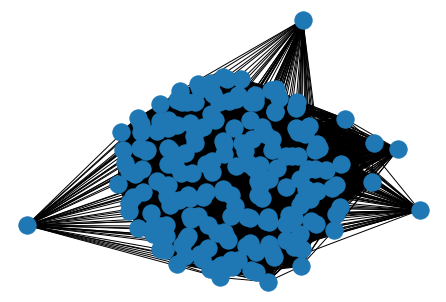

In [343]:
nx.draw_spring(g_text)

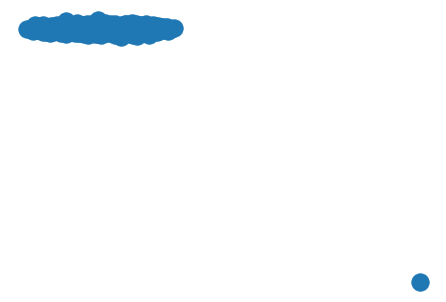

In [344]:
nx.draw_spring(g_tags)

In [345]:
def describe_graph(G):
    print(nx.info(G))
    if nx.is_connected(G):
        print("Avg. Shortest Path Length: %.4f" %nx.average_shortest_path_length(G))
        print("Diameter: %.4f" %nx.diameter(G)) # Longest shortest path
    else:
        print("Graph is not connected")
        print("Diameter and Avg shortest path length are not defined!")
    print("Sparsity: %.4f" %nx.density(G))  # #edges/#edges-complete-graph
    # #closed-triplets(3*#triangles)/#all-triplets
    print("Global clustering coefficient aka Transitivity: %.4f" %nx.transitivity(G))

In [346]:
describe_graph(g_tags)

Name: 
Type: Graph
Number of nodes: 195
Number of edges: 18056
Average degree: 185.1897
Graph is not connected
Diameter and Avg shortest path length are not defined!
Sparsity: 0.9546
Global clustering coefficient aka Transitivity: 0.9692


In [348]:
describe_graph(g_text)

Name: 
Type: Graph
Number of nodes: 195
Number of edges: 18056
Average degree: 185.1897
Avg. Shortest Path Length: 1.0557
Diameter: 2.0000
Sparsity: 0.9546
Global clustering coefficient aka Transitivity: 0.9668


In [349]:
def visualize_graph(G, with_labels=True, k=None, alpha=1.0, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]))
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='g', node_shape=node_shape)
    plt.axis('off')

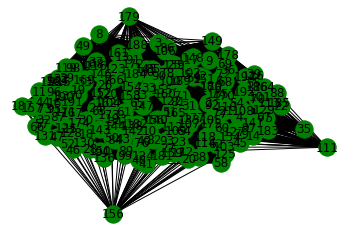

In [350]:
visualize_graph(g_text)

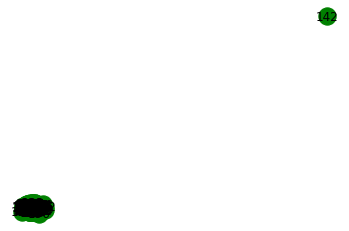

In [351]:
visualize_graph(g_tags)

The tags graph is not connected (there are a few isolated communities)
Homemade solutions is totally isolated

3. Based on what you have calculated, which one has greater diversity: descriptions used by channels, or tags used by channels? Justify your answer.

In [ ]:
text has greater diversity

4. Imagine that you want to **compare** content diversity between two sets of channels (i.e., you want to see which set of channels has more diverse content), and you have calculated a tag-based graph for each set. Do you think the diameter is a good measure for doing the comparison? Justify your answer.

No, I think average degrees can do it better

No, because as we saw, the diameter can end up being undefined for both, which implies that both are diverse but does not provide much of a comparison.

5. Back to our own two graphs. Based on $G_{text}$, for each category of channels, which channel is the one most representative of the contents of all channels in that category? In other words, for each category, if you needed to provide a summary of all channels in the category via one channel, which channel would you choose? Show us (us being the exam designers and your friend) the descriptions of this channel’s two most-viewed videos. What metric did you use for this purpose? Explain your choice.

In [364]:
channel_to_index_pd=pd.DataFrame.from_dict(channel_to_index, orient='index').reset_index()


In [366]:
channel_to_index_pd.columns=['channel','index']
channel_to_index_pd

,channel,index
0,League of Legends,0
1,Desi Perkins,1
2,SSundee,2
3,FROST,3
4,DashieGames,4
...,...,...
190,Yoga With Adriene,190
191,Ceeday,191
192,KSIOlajidebtHD KSIOlajidebtHD,192
193,Jelly,193


In [383]:
channel_to_index_pd['channel'][142]

'Homemade solutions'

Betweeness centrality: the more shortest paths pass through a node, the more important it is!

In [382]:
from operator import itemgetter
# Compute betweenness centrality
betweenness = nx.betweenness_centrality(g_text)
# Assign the computed centrality values as a node-attribute in your network
nx.set_node_attributes(g_text, betweenness, 'betweenness')
sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)

for idx, bw in sorted_betweenness[:5]:
#     print(channel_to_index_pd.loc[channel_to_index_pd['index']==idx]['channel'][idx])
    print(channel_to_index_pd.loc[channel_to_index_pd['index']==idx]['channel'][idx], 'channel is', g_text.nodes[idx], 'has betweeness: %.3f' %bw)

Desi Perkins channel is {'betweenness': 0.0006646947034697917} has betweeness: 0.001
ExplodingTNT channel is {'betweenness': 0.0006646947034697917} has betweeness: 0.001
videogamedunkey channel is {'betweenness': 0.0006646947034697917} has betweeness: 0.001
Ingrid Nilsen channel is {'betweenness': 0.0006646947034697917} has betweeness: 0.001
jeffreestar channel is {'betweenness': 0.0006646947034697917} has betweeness: 0.001


Degree: the more channel you connect, the more important you are!

In [387]:
degrees = dict(g_text.degree(g_text.nodes()))
sorted_degree = sorted(degrees.items(), key=itemgetter(1), reverse=True)

# And the top 5 most popular quakers are.. 
for idx, degree in sorted_degree[:5]:
    print(channel_to_index_pd.loc[channel_to_index_pd['index']==idx]['channel'][idx] ,'channel connects', degree, 'channel')

Desi Perkins channel connects 196 channel
ExplodingTNT channel connects 196 channel
videogamedunkey channel connects 196 channel
Ingrid Nilsen channel connects 196 channel
jeffreestar channel connects 196 channel


## C2: Going back to categories again

1. We want to use the two graphs to cluster channels from the same category together, and we want to compare their effectiveness at doing so. Use Kernighan-Lin bisection in the networkx package (`networkx.algorithms.community.kernighan_lin_bisection`) to divide each graph into two communities. Use 42 as the random seed. For each graph, show how many members of each category fall into each of the two communities.

In [394]:
from networkx.algorithms import community
result_g_text=community.kernighan_lin_bisection(g_text, max_iter=10, weight='weight', seed=42)
result_g_text

({0,
  2,
  5,
  10,
  12,
  14,
  15,
  16,
  18,
  19,
  20,
  23,
  27,
  28,
  30,
  32,
  33,
  35,
  36,
  37,
  38,
  41,
  42,
  43,
  44,
  46,
  48,
  51,
  52,
  53,
  54,
  60,
  61,
  63,
  64,
  65,
  66,
  69,
  72,
  73,
  76,
  78,
  79,
  80,
  83,
  84,
  90,
  94,
  95,
  97,
  100,
  101,
  102,
  103,
  104,
  105,
  109,
  110,
  112,
  113,
  118,
  121,
  123,
  124,
  125,
  131,
  132,
  135,
  136,
  138,
  140,
  142,
  144,
  146,
  147,
  152,
  156,
  157,
  158,
  159,
  162,
  167,
  169,
  170,
  171,
  174,
  175,
  179,
  180,
  181,
  182,
  183,
  185,
  187,
  190,
  191,
  194},
 {1,
  3,
  4,
  6,
  7,
  8,
  9,
  11,
  13,
  17,
  21,
  22,
  24,
  25,
  26,
  29,
  31,
  34,
  39,
  40,
  45,
  47,
  49,
  50,
  55,
  56,
  57,
  58,
  59,
  62,
  67,
  68,
  70,
  71,
  74,
  75,
  77,
  81,
  82,
  85,
  86,
  87,
  88,
  89,
  91,
  92,
  93,
  96,
  98,
  99,
  106,
  107,
  108,
  111,
  114,
  115,
  116,
  117,
  119,
  120,
  122,
  1

In [409]:
channel_cat=youtube_year.groupby(['channel_cat','channel']).count().reset_index()[['channel_cat','channel']]
channel_cat

,channel_cat,channel
0,Gaming,Ali-A
1,Gaming,Aphmau
2,Gaming,Azerrz
3,Gaming,BCC Trolling
4,Gaming,Bajan Canadian
...,...,...
190,Howto & Style,cutepolish
191,Howto & Style,dope2111
192,Howto & Style,grav3yardgirl
193,Howto & Style,jaipurthepinkcity


In [410]:
channel_to_index_pd=pd.merge(channel_to_index_pd,channel_cat,how='inner',on=["channel"],right_index=True)
channel_to_index_pd

,channel,index,channel_cat
0,League of Legends,0,Gaming
1,Desi Perkins,1,Howto & Style
2,SSundee,2,Gaming
3,FROST,3,Gaming
4,DashieGames,4,Gaming
...,...,...,...
190,Yoga With Adriene,190,Howto & Style
191,Ceeday,191,Gaming
192,KSIOlajidebtHD KSIOlajidebtHD,192,Gaming
193,Jelly,193,Gaming


In [412]:
channel_to_index_pd_game=channel_to_index_pd[channel_to_index_pd['channel_cat']=='Gaming']['index']
channel_to_index_pd_game

0        0
2        2
3        3
4        4
9        9
      ... 
189    189
191    191
192    192
193    193
194    194
Name: index, Length: 99, dtype: int64

In [413]:
channel_to_index_pd_howto=channel_to_index_pd[channel_to_index_pd['channel_cat']=='Howto & Style']['index']
channel_to_index_pd_howto

1        1
5        5
6        6
7        7
8        8
      ... 
183    183
185    185
186    186
187    187
190    190
Name: index, Length: 96, dtype: int64

In [498]:
from networkx.algorithms.community import kernighan_lin_bisection

result_g_tags=community.kernighan_lin_bisection(g_tags, max_iter=10, seed=42)
result_g_tags

({0,
  2,
  3,
  4,
  5,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  18,
  27,
  28,
  30,
  32,
  33,
  36,
  37,
  42,
  43,
  44,
  46,
  51,
  52,
  54,
  60,
  63,
  64,
  65,
  66,
  69,
  71,
  72,
  73,
  75,
  76,
  78,
  79,
  80,
  83,
  84,
  90,
  94,
  95,
  98,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  109,
  110,
  111,
  112,
  113,
  118,
  121,
  123,
  124,
  125,
  126,
  128,
  132,
  135,
  136,
  140,
  142,
  144,
  146,
  147,
  149,
  152,
  157,
  158,
  161,
  162,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  174,
  175,
  180,
  181,
  182,
  185,
  188,
  191,
  192,
  194},
 {1,
  6,
  7,
  8,
  9,
  17,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  29,
  31,
  34,
  35,
  38,
  39,
  40,
  41,
  45,
  47,
  48,
  49,
  50,
  53,
  55,
  56,
  57,
  58,
  59,
  61,
  62,
  67,
  68,
  70,
  74,
  77,
  81,
  82,
  85,
  86,
  87,
  88,
  89,
  91,
  92,
  93,
  96,
  97,
  99,
  107,
  108,
  114,
  115,
  116,
  117,
  119,
  120,
  1

In [418]:
type(set(channel_to_index_pd_game))

set

In [417]:
type(result_g_tags[0])

set

In [499]:
len(set(channel_to_index_pd_game).intersection(result_g_tags[0]))

60

In [500]:
len(set(channel_to_index_pd_game).intersection(result_g_tags[1]))

39

In [501]:
len(set(channel_to_index_pd_howto).intersection(result_g_tags[0]))

37

In [502]:
len(set(channel_to_index_pd_howto).intersection(result_g_tags[1]))

59

In [503]:
len(set(channel_to_index_pd_game).intersection(result_g_text[0]))

49

In [504]:
len(set(channel_to_index_pd_game).intersection(result_g_text[1]))

50

In [505]:
len(set(channel_to_index_pd_howto).intersection(result_g_text[0]))

48

In [506]:
len(set(channel_to_index_pd_howto).intersection(result_g_text[1]))

48

2. If one of these graphs were ideal for this clustering task, what would the resulting communities look like? If it were the absolute worst possible graph for the task, what would the resulting communities look like?

One is nearly zero, one is nearly all, but what I get is not good

The ideal communities would be such that each would contain only one category. The worst communities would be evenly split between the two categories (i.e. 50% gaming and 50% howto).

3. Calculate the probability $P(community|category)$ for each community and category within each graph. Design a metric, using the four $P(community|category)$ values in a graph, whose value would be 1 for the ideal graph and 0 for the worst graph. Calculate this metric for both graphs and compare the two. What do the results say about how representative tags and descriptions are regarding the channel categories? Are tags better suited, or descriptions?

In [433]:
P_community1_Game=60/99
P_community1_Game

0.6060606060606061

In [432]:
P_community2_howto=59/(59+37)
P_community2_howto

0.6145833333333334

In [435]:
P_community1_Game_text=50/99
P_community1_Game_text

0.5050505050505051

In [434]:
P_community2_howto_text=48/(48+48)
P_community2_howto_text

0.5

We can see tags have higher accuracy, so I am gonna choose tags

4. The Kernighan-Lin bisection you used above performs a min-edge cut: It attempts to partition the nodes of the graph into two sets of almost-equal size by deleting as few edges as possible. It starts off by creating a random partition of the nodes of the graph into two sets A and B that are almost equal in size, and then iteratively and in a greedy fashion moves nodes between A and B to reduce the number of edges between A and B. Show at least one toy example of a graph where the initialization could also be the final result. (Hint: Think of how, as we explained, the bisection algorithm relies on a minimum edge cut with a random initialization; under what circumstances could the original A and B be the best partition given that graph?)

In [443]:
G = nx.Graph() # for a directed graph use nx.DiGraph()
G.add_node(1)
G.add_nodes_from(range(2,9))  # add multiple nodes at once

# add edges 
G.add_edge(1,2)
edges = [(2,3), (1,3), (4,1),(4,2), (4,5),(4,3), (5,6), (5,7), (6,7),(5,8), (7,8), (6,8)]
G.add_edges_from(edges)
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8))

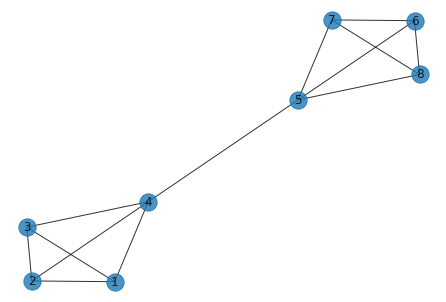

In [444]:
nx.draw_spring(G, with_labels=True,  alpha = 0.8)

In [445]:
G_result=community.kernighan_lin_bisection(G, max_iter=10, weight='weight', seed=42)

In [446]:
G_result

({5, 6, 7, 8}, {1, 2, 3, 4})